<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
C:\Users\german.perez\AppData\Local\Temp\ipykernel_41476\1733519763.py:20: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file_path, sep='\s+', decimal='.', header=None, skiprows=1, encoding='ISO-8859-1')
C:\Users\german.perez\AppData\Local\Temp\ipykernel_41476\1733519763.py:29: SyntaxWarning: invalid escape sequence '\s'
  df_empuje = pd.read_csv(file_path_empuje, sep='\s+', decimal='.', header=None)


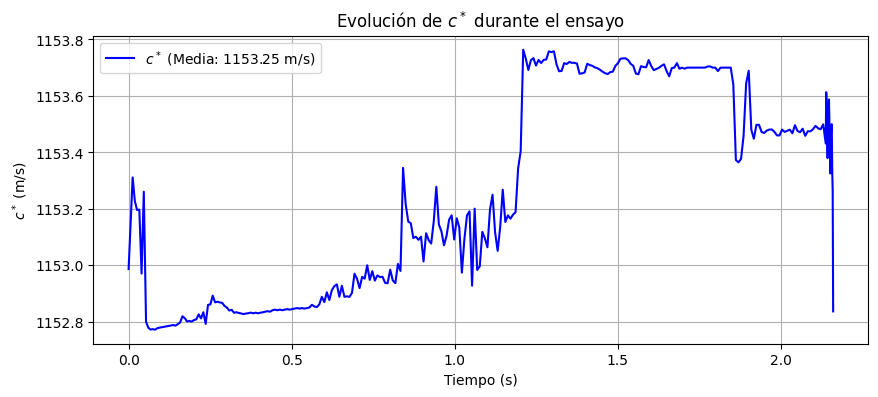

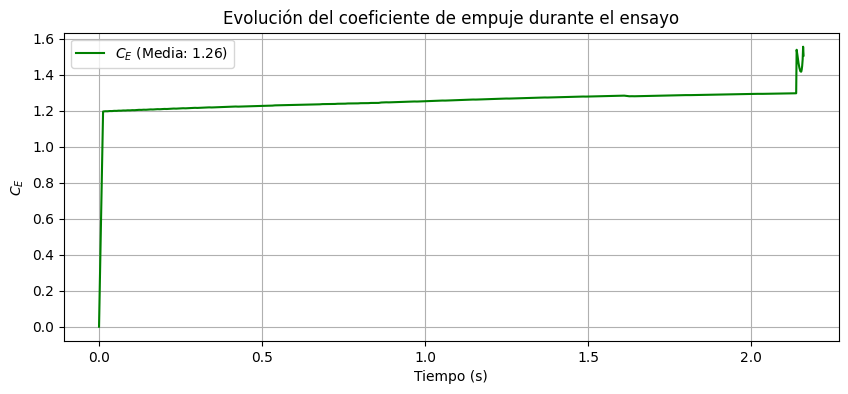

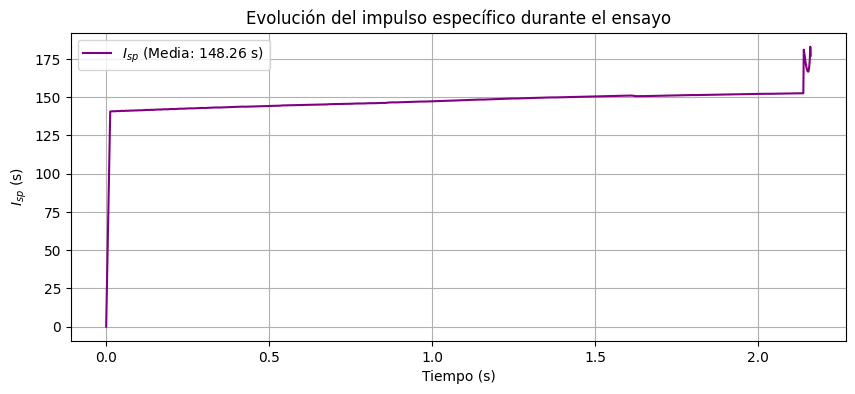

In [26]:
## C*, C_e e Isp

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Definir la ruta del archivo
file_path = r"C:/Users/german.perez/OneDrive - Destinus NL BV/Escritorio/Personal/TFG/Fotos/6 - Resultados/resultados_equilibrio.txt"
file_path_empuje = r"C:/Users/german.perez/OneDrive - Destinus NL BV/Escritorio/Personal/TFG/code/EnsayoCJ_V2_M/Empuje Teorico.txt"

# Definir las rutas de guardado de las imágenes
output_paths = {
    "composicion_gases": r"C:/Users/german.perez/OneDrive - Destinus NL BV/Escritorio/Personal/TFG/Fotos/6 - Resultados/composicion_gases.png",
    "c_star": r"C:/Users/german.perez/OneDrive - Destinus NL BV/Escritorio/Personal/TFG/Fotos/6 - Resultados/6 - c_star.png",
    "coeficiente_empuje": r"C:/Users/german.perez/OneDrive - Destinus NL BV/Escritorio/Personal/TFG/Fotos/6 - Resultados/6 - coeficiente_empuje.png",
    "isp": r"C:/Users/german.perez/OneDrive - Destinus NL BV/Escritorio/Personal/TFG/Fotos/6 - Resultados/6 - isp.png"
}

# Leer los datos de equilibrio
df = pd.read_csv(file_path, sep='\s+', decimal='.', header=None, skiprows=1, encoding='ISO-8859-1')

# Definir los nombres de las columnas
df.columns = ['Tiempo', 'Presión', 'Temperatura', 'Cp', 'Mm', 'Rg', 'Gamma', 'Vsound', 'N_KOH', 'N_K2CO3', 'N_K2O', 'N_CO', 'N_CO2', 'N_H2O', 'N_H2', 'N_H', 'N_OH', 'N_O', 'N_O2', 'N_N2']

# Convertir las columnas numéricas a flotante
df = df.astype(float)

# Leer los datos de empuje
df_empuje = pd.read_csv(file_path_empuje, sep='\s+', decimal='.', header=None)
df_empuje.columns = ['Tiempo1', 'Empuje1', 'Tiempo2', 'Empuje2', 'Tiempo3', 'Empuje3']

# Función para calcular Gamma(gamma)
def gamma_function(gamma):
    return np.sqrt(gamma) * (2 / (gamma + 1)) ** ((gamma + 1) / (2 * (gamma - 1)))

# Calcular c*
df['Gamma_val'] = df['Gamma'].apply(gamma_function)
df['c_star'] = np.sqrt(df['Rg'] * df['Temperatura']) / df['Gamma_val']
mean_c_star = df['c_star'].mean()

# Calcular coeficiente de empuje C_E
Ag = 7.466*10**(-5)  # Área de garganta en m^2 (Modificar según sea necesario)
df['C_E'] = df_empuje['Empuje2'] / ((df['Presión']*10**5) * Ag)
mean_C_E = df['C_E'].mean()

# Calcular Isp
g0 = 9.81  # Gravedad estándar (m/s^2)
df['Isp'] = df['c_star'] * df['C_E'] / g0
mean_Isp = df['Isp'].mean()

# Graficar c*
plt.figure(figsize=(10, 4))
plt.plot(df['Tiempo'], df['c_star'], color='blue', label=f'$c^*$ (Media: {mean_c_star:.2f} m/s)')
plt.xlabel("Tiempo (s)")
plt.ylabel("$c^*$ (m/s)")
plt.title("Evolución de $c^*$ durante el ensayo")
plt.legend()
plt.grid()
plt.savefig(output_paths["c_star"], dpi=300)
plt.show()

# Graficar coeficiente de empuje C_E
plt.figure(figsize=(10, 4))
plt.plot(df['Tiempo'], df['C_E'], color='green', label=f'$C_E$ (Media: {mean_C_E:.2f})')
plt.xlabel("Tiempo (s)")
plt.ylabel("$C_E$")
plt.title("Evolución del coeficiente de empuje durante el ensayo")
plt.legend()
plt.grid()
plt.savefig(output_paths["coeficiente_empuje"], dpi=300)
plt.show()

# Graficar Isp
plt.figure(figsize=(10, 4))
plt.plot(df['Tiempo'], df['Isp'], color='purple', label=f'$I_{{sp}}$ (Media: {mean_Isp:.2f} s)')
plt.xlabel("Tiempo (s)")
plt.ylabel("$I_{sp}$ (s)")
plt.title("Evolución del impulso específico durante el ensayo")
plt.legend()
plt.grid()
plt.savefig(output_paths["isp"], dpi=300)
plt.show()

In [ ]:
## Calculo y almacenamiento en txt de r_dot, Ab, r0, C_1, hc, Gc, GL12

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Definir la ruta del archivo de entrada
file_path = r"C:/Users/german.perez/OneDrive - Destinus NL BV/Escritorio/Personal/TFG/Fotos/6 - Resultados/resultados_equilibrio.txt"

# Definir la ruta de guardado del archivo de salida y las imágenes
txt_output_path = r"C:/Users/german.perez/OneDrive - Destinus NL BV/Escritorio/Personal/TFG/Fotos/6 - Resultados/t_P_T_rdot_Ab_C1_hc_Gc_GL12.txt"
img_output_path = r"C:/Users/german.perez/OneDrive - Destinus NL BV/Escritorio/Personal/TFG/Fotos/6 - Resultados/"

# Leer los datos, seleccionando 'Tiempo', 'Presión' y 'Temperatura'
columns = ['Tiempo', 'Presión', 'Temperatura', 'Cp', 'Mm']
df = pd.read_csv(file_path, sep='\s+', decimal='.', header=None, skiprows=1, usecols=[0, 1, 2, 3, 4], names=columns, encoding='ISO-8859-1')
df = df.astype(float)

# Convertir la presión a bares si está en otra unidad
df['Presión_bar'] = df['Presión'] * 0.1  # Suponiendo que la presión está en kPa y queremos pasar a bar


result = [1,2] #//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


# Definir las condiciones para asignar 'a' y 'n'
def asignar_a_n(presion):
    if 0.1 <= presion < 0.8:
        return 10.71, 0.625
    elif 0.8 <= presion < 1.5:
        return 8.763, -0.314
    elif 1.5 <= presion <= 3.7:
        return 7.852, -0.013
    else:
        return np.nan, np.nan  # Manejo de casos fuera de rango

# Aplicar la función a cada fila del DataFrame
df[['a', 'n']] = df['Presión_bar'].apply(lambda p: pd.Series(asignar_a_n(p)))

# Calcular velocidad de recesión (r_dot)
df['Velocidad_recesion'] = (df['a'] * (df['Presión_bar']) ** df['n'])

# Cuando la presión alcanza su máximo (24.09 bar), la velocidad de recesión se vuelve nula para todo tiempo posterior
max_presion_tiempo = df.loc[df['Presión_bar'].idxmax(), 'Tiempo']
df.loc[df['Tiempo'] >= max_presion_tiempo, 'Velocidad_recesion'] = 0

# Eliminar filas con valores NaN (por presiones fuera del rango definido)
df = df.dropna()

# Parámetros iniciales
r0_i = 7  # mm
H1 = 100  # mm
c_ = 1373  # J/kgK
rho = 1890  # kg/m³
r1 = 24  # mm
r2 = 25 # mm
B = 3.075 # adimensional
w = 0.287/2.16 #kg/s
L= 0.120 # m
k1 = 0.71 # w/mK
k2 = 0.18 # w/mK

# Calcular r0, Ab y C1
df['r0'] = r0_i + df['Velocidad_recesion'] * df['Tiempo']
df.loc[df['Tiempo'] >= max_presion_tiempo, 'r0'] = r1

df['Ab'] = 2 * np.pi * H1 * df['r0']/1000000
df['C1'] = np.where(df['r0'] >= r1, 0, c_ * rho * np.pi * H1 * (r1**2 - df['r0']**2))/1000000000
m = np.where(df['r0'] >= r1, 0, rho * np.pi * H1 * (r1**2 - df['r0']**2))/1000000000
G = np.where(df['r0'] >= r1, m/((np.pi *r1**2)/1000000), m/((np.pi *df['r0']**2)/1000000) )
Di = 2* df['r0']/1000
df['hc_'] = B * ((df['Cp']/df['Mm'])/1000) * (((G**0.8))/(Di**0.2))*(1+(Di/L)**0.7)
df['hc'] = np.where(df['hc_'] <= 10, 50, df['hc_'])
df['Gc'] = df['hc']*df['Ab']
GL2 = ((2* np.pi *k2*H1/1000)/(np.log((r1+r2)/(2*r1))))*(2* np.pi *r1*H1/1000000)
df['GL1'] = np.where(df['r0'] >= r1, 1, ((2* np.pi *k1*H1/1000)/(np.log((2*r1)/(df['r0']+r1))))*(2* np.pi *r1*H1/1000000))
df['GL12'] = 1 / ( (1/df['GL1']) + (1/GL2) )

# Guardar los datos en un archivo TXT
df[['Tiempo', 'Presión_bar', 'Temperatura', 'Velocidad_recesion', 'r0', 'Ab', 'C1', 'hc', 'Gc', 'GL12']].to_csv(txt_output_path, sep='\t', index=False, header=True)

# Graficar cada variable con el tiempo
variables = ['Presión_bar', 'Temperatura', 'Velocidad_recesion', 'r0', 'Ab', 'C1', 'hc', 'Gc', 'GL1', 'GL12']
nombres = ['Presión (MPa)', 'Temperatura (K)', 'Velocidad de recesión (mm/s)', 'r0 (mm)', 'Área de combustión Ab (m²)', 'C1 (J/K)', 'hc ($W/Km^2$)', 'Gc (W/K)', 'GL1 (W/K)', 'GL12 (W/K)']

for var, nombre in zip(variables, nombres):
    plt.figure(figsize=(10, 4))
    plt.plot(df['Tiempo'], df[var], label=nombre, color='b')
    plt.xlabel("Tiempo (s)")
    plt.ylabel(nombre)
    plt.title(f"Evolución de {nombre}")
    plt.grid()
    plt.legend()
    plt.savefig(f"{img_output_path}06 - {var}.png", dpi=300)
    plt.show()




<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
C:\Users\german.perez\AppData\Local\Temp\ipykernel_42792\4259267053.py:16: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file_path, sep='\s+', decimal='.', header=None, skiprows=1, usecols=[0, 1, 2, 3, 4], names=columns, encoding='ISO-8859-1')
C:\Users\german.perez\AppData\Local\Temp\ipykernel_42792\4259267053.py:16: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file_path, sep='\s+', decimal='.', header=None, skiprows=1, usecols=[0, 1, 2, 3, 4], names=columns, encoding='ISO-8859-1')


AttributeError: 'list' object attribute 'append' is read-only